### This demo follows https://github.com/tylerharter/cs320/blob/master/s20/lab5/README.md

# Part 1

In [3]:
from graphviz import Graph, Digraph

In [4]:
class Node():
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.left = None
        self.right = None

In [5]:
class BST():
    def __init__(self):
        self.root = None
        self.size = 0

    def add(self, key, val):
        if self.root == None:
            self.root = Node(key, val)
            self.size += 1

        start = self.root
        while True:
            if key == start.key:
                start.val = val
                return
            elif key < start.key:
                if start.left == None:
                    start.left = Node(key, val)
                    self.size += 1
                    return
                start = start.left
            else:
                if start.right == None:
                    start.right = Node(key, val)
                    self.size += 1
                    return
                start = start.right
    def __len__(self):
        return self.size
    
    def __dump(self, node):
        if node == None:
            return
        self.__dump(node.left)          # C
        print(node.key, ": ", node.val) # B

        self.__dump(node.right)         # A
       
    def dump(self):
        self.__dump(self.root)
        
    def __setitem__(self, key, val):
        self.add(key, val)
    
    def __lookup(self, node, key):
        if node == None:
            return None # default
        elif node.key == key:
            return node.val
        elif key < node.key:
            return self.__lookup(node.left, key)
        else:
            assert key > node.key
            return self.__lookup(node.right, key)

    def __getitem__(self, key):
        return self.__lookup(self.root, key)
    
    ## vis
    def __graphviz(self, g, node):
        g.node(node.key)
        for label, child in [("L", node.left), ("R", node.right)]:
            if child != None:
                self.__graphviz(g, child)
                g.edge(node.key, child.key, label=label)
    
    def _repr_svg_(self):
        g = Digraph()
        if self.root != None:
            self.__graphviz(g, self.root)
        return g._repr_svg_()
    
    def _max_depth(self, node = None):
        if node is None or (node.left is None and node.right is None):
            return 0
        return 1 + max(self._max_depth(node.left), self._max_depth(node.right))
    
    def max_depth(self):
        return self._max_depth(self.root)
        

In [6]:
t = BST()
t.add("B", 3)
t.add("A", 2)
t.add("C", 1)
t.add("D", 4)
t.add("E", 5)

t.max_depth()

3

In [7]:
t = BST()
t.add("B", 3)
assert t.size == 1
t.add("A", 2)
assert t.size == 2
t.add("C", 1)
assert t.size == 3
t.add("C", 4)
assert t.size == 3

In [8]:
t = BST()
t.add("B", 3)
assert len(t) == 1
t.add("A", 2)
assert len(t) == 2
t.add("C", 1)
assert len(t) == 3
t.add("C", 4)
assert len(t) == 3

In [9]:
t.dump()

A :  2
B :  3
C :  4


In [10]:
t = BST()
t["B"] = 3
t["A"] = 2
t["C"] = 1
t["C"] = 4
t.dump()

A :  2
B :  3
C :  4


In [11]:
t = BST()

# test default
print(t["default"])

# test root
t["B"] = 1
print(t["B"])

# test right child
t["C"] = 2
print(t["C"])

# test update
t["B"] = 3
print(t["B"])

None
1
2
3


In [12]:
t["A"] = 0
print(t["A"])

0


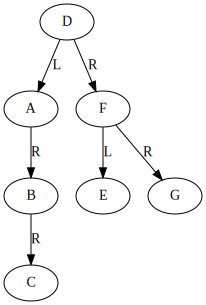

In [13]:
t = BST()
t["D"] = 9
t["A"] = 8
t["B"] = 7
t["C"] = 6
t["F"] = 5
t["E"] = 4
t["G"] = 3
t

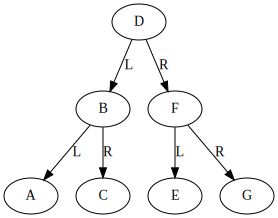

In [14]:
t = BST()
t["D"] = 9
t["B"] = 7
t["F"] = 5
t["A"] = 8
t["C"] = 6
t["E"] = 4
t["G"] = 3
t

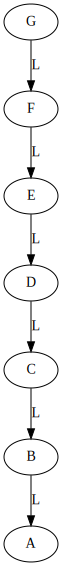

In [15]:
t = BST()
t["G"] = 3
t["F"] = 5
t["E"] = 4
t["D"] = 9
t["C"] = 6
t["B"] = 7
t["A"] = 8
t

# Part 2

In [16]:
from datetime import datetime
fri = datetime(2020, 2, 21)

In [17]:
fri.strftime("%d of %b")

'21 of Feb'

In [21]:
fri.strftime("%d of %b, %Y")

'21 of Feb, 2020'

In [22]:
fri.strftime("%A")

'Friday'

In [25]:
fri.strftime("%a, %B %d")

'Fri, February 21'

In [27]:
fri.strftime("%Y-%m-%d")

'2020-02-21'

In [28]:
fri.strftime("%Y%m%d")

'20200221'

In [34]:
now = datetime.now()
now

datetime.datetime(2020, 5, 26, 12, 3, 56, 548670)

In [37]:
now.strftime("%I %p")

'12 PM'

In [38]:
now.strftime("%H:%M:%S")

'12:03:56'

In [39]:
now.strftime("%H:%M:%S.%f")

'12:03:56.548670'

In [40]:
now.strftime("%H:%M:%S.%f on %Y-%m-%d")

'12:03:56.548670 on 2020-05-26'

In [44]:
now.strftime("%Y%m%d%H%M%S")

'20200526120356'

In [46]:
fruits = ['apple', 'banana', 'cherry']
fruits.pop(0)

'apple'

# Part 3

In [48]:
from time import time

vals = list(range(200000)) # 200K
total = 0

t0 = time()
while len(vals) > 0:
    total += vals.pop(0)
t1 = time()
print("SUM:", total)
print("SECONDS:", t1-t0)

SUM: 19999900000
SECONDS: 3.526895046234131


In [49]:
from time import time
from collections import deque

vals = deque(range(200000)) # 200K
total = 0

t0 = time()
while len(vals) > 0:
    total += vals.popleft()
t1 = time()
print("SUM:", total)
print("SECONDS:", t1-t0)

SUM: 19999900000
SECONDS: 0.04389619827270508
